In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

#### Read in data

In [2]:
# read in data
cards_played_by_trick = pd.read_csv("C:\\Users\\ISLG\\OneDrive\\Documents\\Graduate School\\Data Mining\\Final Project\\game data\\cards_played_per_trick.csv")
tricks_won_by_player = pd.read_csv("C:\\Users\\ISLG\\OneDrive\\Documents\\Graduate School\\Data Mining\\Final Project\\game data\\tricks_won_by_player.csv")
player_hands_by_round = pd.read_csv("C:\\Users\\ISLG\\OneDrive\\Documents\\Graduate School\\Data Mining\\Final Project\\game data\\player_hands_by_round.csv")


In [3]:
cards_played_by_trick.head()

,round,trick,player_0_card,player_1_card,player_2_card,player_3_card,winning_card,round_winner_name
0,0,1,S_4,S_12,S_11,S_14,S_14,Maria
1,0,2,D_4,D_9,D_6,D_12,D_12,Maria
2,0,3,S_2,S_7,S_8,S_5,S_8,Felix
3,0,4,S_6,S_13,H_4,C_13,S_13,Arjun
4,0,5,S_10,S_3,D_11,H_11,S_10,Samuel


In [4]:
tricks_won_by_player.head()

,player_name,round,tricks_won
0,Samuel,0,1
1,Arjun,0,6
2,Felix,0,3
3,Maria,0,3
4,Samuel,1,2


In [5]:
player_hands_by_round.head()

,player_name,round,D_8,S_4,H_7,C_7,S_2,S_6,H_2,D_4,...,H_11,D_7,H_12,C_3,H_10,S_5,C_11,D_12,C_6,C_13
0,Samuel,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arjun,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Felix,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Maria,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Samuel,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN


#### Get the percent that a card was the winning card / how often it was played

In [6]:
all_cards = pd.concat([cards_played_by_trick["player_0_card"], cards_played_by_trick["player_1_card"], cards_played_by_trick["player_2_card"], cards_played_by_trick["player_3_card"]])

card_plays = all_cards.value_counts()

win_counts = cards_played_by_trick["winning_card"].value_counts()

relative_card_values = win_counts / card_plays

relative_card_values = relative_card_values.sort_values(ascending = False)

relative_card_values

S_14    1.00000
S_13    0.83562
S_12    0.69412
D_14    0.64438
H_14    0.64417
C_14    0.64261
S_11    0.57624
C_13    0.50457
H_13    0.50268
D_13    0.49830
S_10    0.47394
S_9     0.39694
D_12    0.38497
H_12    0.38440
C_12    0.38190
S_8     0.33329
H_11    0.28845
D_11    0.28806
C_11    0.28743
S_7     0.28436
S_6     0.24802
S_5     0.22091
D_10    0.21034
H_10    0.20840
C_10    0.20833
S_4     0.19970
S_3     0.18328
S_2     0.16878
H_9     0.14776
C_9     0.14665
D_9     0.14627
D_8     0.10191
H_8     0.10138
C_8     0.10062
C_7     0.06754
D_7     0.06725
H_7     0.06703
D_6     0.04442
C_6     0.04384
H_6     0.04354
H_5     0.02932
C_5     0.02841
D_5     0.02835
H_4     0.02088
C_4     0.01997
D_4     0.01992
D_3     0.01498
H_3     0.01497
C_3     0.01454
C_2     0.01227
H_2     0.01225
D_2     0.01174
Name: count, dtype: float64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, 'S_14'),
  Text(1, 0, 'S_13'),
  Text(2, 0, 'S_12'),
  Text(3, 0, 'D_14'),
  Text(4, 0, 'H_14'),
  Text(5, 0, 'C_14'),
  Text(6, 0, 'S_11'),
  Text(7, 0, 'C_13'),
  Text(8, 0, 'H_13'),
  Text(9, 0, 'D_13'),
  Text(10, 0, 'S_10'),
  Text(11, 0, 'S_9'),
  Text(12, 0, 'D_12'),
  Text(13, 0, 'H_12'),
  Text(14, 0, 'C_12'),
  Text(15, 0, 'S_8'),
  Text(16, 0, 'H_11'),
  Text(17, 0, 'D_11'),
  Text(18, 0, 'C_11'),
  Text(19, 0, 'S_7'),
  Text(20, 0, 'S_6'),
  Text(21, 0, 'S_5'),
  Text(22, 0, 'D_10'),
  Text(23, 0, 'H_10'),
  Text(24, 0, 'C_10'),
  Text(25, 0, 'S_4'),
  Text(26, 0, 'S_3'),
  Text(27, 0, 'S_2'),
  Text(28, 0, 'H_9'),
  Text(29, 0, 'C_9'),
  Text(30, 0, 'D_9'),
  Tex

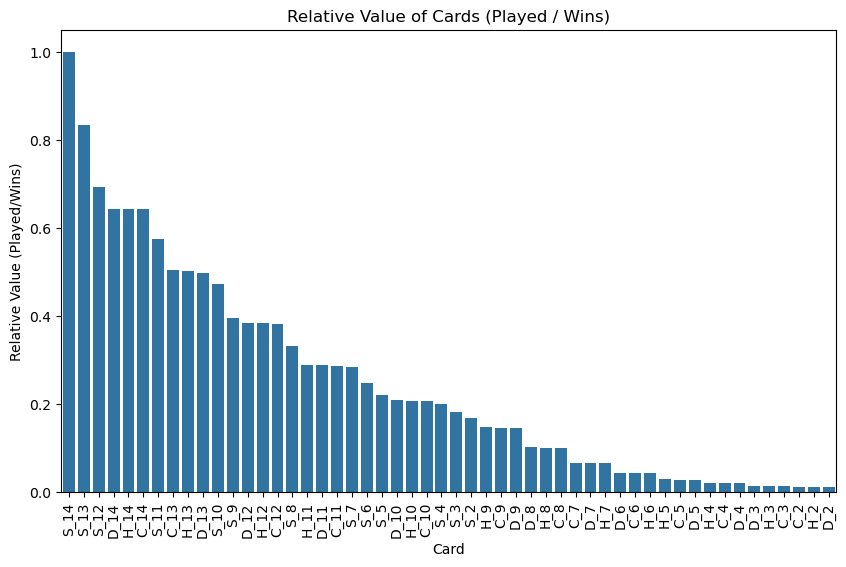

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x = relative_card_values.index, y = relative_card_values.values)

plt.xlabel("Card")
plt.ylabel("Relative Value (Played/Wins)")
plt.title("Relative Value of Cards (Played / Wins)")

plt.xticks(rotation=90)

#### As we would expect spades and high value face cards win most often

#### Replace NaN with 0 in player_hands_by_round dataset

In [8]:
player_hands_by_round = player_hands_by_round.fillna(0)
player_hands_by_round_with_tricks = player_hands_by_round.merge(tricks_won_by_player, how = "left", on = ["player_name", "round"])

In [9]:
player_hands_by_round_with_tricks.head()

,player_name,round,D_8,S_4,H_7,C_7,S_2,S_6,H_2,D_4,...,D_7,H_12,C_3,H_10,S_5,C_11,D_12,C_6,C_13,tricks_won
0,Samuel,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,Arjun,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2,Felix,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,Maria,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3
4,Samuel,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2


#### We want to check if our data is suitable for a Multilinear regression since want to predict tricks won

#### Lineararity

In [10]:
corr_player_hands_by_round_with_tricks = player_hands_by_round_with_tricks.drop(["player_name", "round"], axis = 1).corr()

In [11]:
card_and_tricks_correlations = player_hands_by_round_with_tricks.drop(columns=["player_name", "round", "tricks_won"], axis = 1).corrwith(
    player_hands_by_round_with_tricks["tricks_won"])

card_and_tricks_correlations.sort_values(ascending = False)

S_14    0.321746
S_13    0.269093
S_12    0.219982
S_11    0.179655
S_10    0.149365
S_9     0.120689
H_14    0.104896
C_14    0.104824
D_14    0.103328
S_8     0.103062
S_7     0.085213
S_6     0.075452
S_5     0.065123
C_13    0.059364
S_4     0.058655
H_13    0.058324
D_13    0.054109
S_3     0.050334
S_2     0.044246
C_12    0.017948
D_12    0.016747
H_12    0.016410
D_11   -0.009896
C_11   -0.012359
H_11   -0.012661
C_10   -0.034721
H_10   -0.036735
D_10   -0.037047
D_9    -0.056999
H_9    -0.057875
C_9    -0.060751
H_8    -0.071778
D_8    -0.072546
C_8    -0.075268
H_7    -0.085193
D_7    -0.085620
C_7    -0.085669
D_6    -0.090612
C_6    -0.091619
H_6    -0.092816
H_5    -0.096365
D_5    -0.096689
C_5    -0.097313
H_4    -0.097457
C_4    -0.098621
H_3    -0.100796
H_2    -0.102186
C_3    -0.102626
D_2    -0.103492
C_2    -0.103505
D_3    -0.103705
D_4    -0.105647
dtype: float64

#### Check Spades Cards

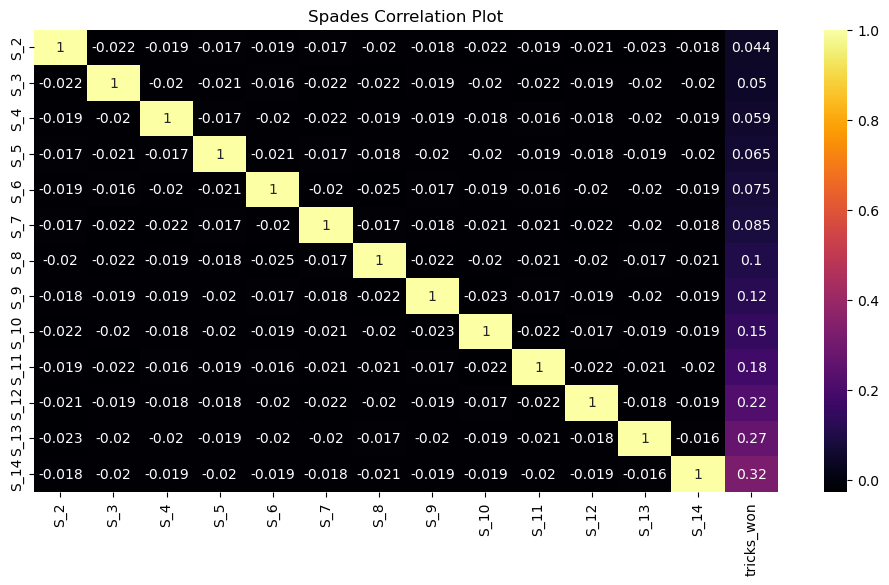

In [12]:
spades = ["S_2", "S_3", "S_4", "S_5", "S_6", "S_7", "S_8", "S_9", "S_10", "S_11", "S_12", "S_13", "S_14"]

corr_player_hands_spades = corr_player_hands_by_round_with_tricks[spades + ["tricks_won"]]

corr_player_hands_spades = corr_player_hands_spades[corr_player_hands_spades.index.isin(spades)]

order_map = {card: idx for idx, card in enumerate(spades)}

# Sort the DataFrame based on the custom order
corr_player_hands_spades  = corr_player_hands_spades .loc[sorted(corr_player_hands_spades.index, key=lambda x: order_map[x])]

plt.figure(figsize=(12, 6))
plt.title("Spades Correlation Plot")
sns.heatmap(corr_player_hands_spades, annot = True, cmap = "inferno")
plt.show()

#### \Check Diamonds

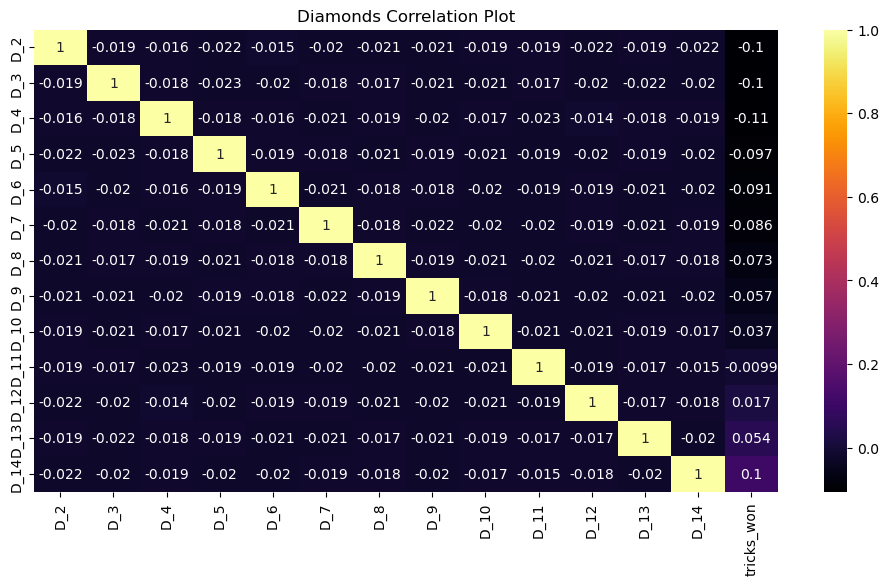

In [13]:
diamonds = ["D_2", "D_3", "D_4", "D_5", "D_6", "D_7", "D_8", "D_9", "D_10", "D_11", "D_12", "D_13", "D_14"]

corr_player_hands_diamonds = corr_player_hands_by_round_with_tricks[diamonds + ["tricks_won"]]

corr_player_hands_diamonds = corr_player_hands_diamonds[corr_player_hands_diamonds.index.isin(diamonds)]

order_map = {card: idx for idx, card in enumerate(diamonds)}

# Sort the DataFrame based on the custom order
corr_player_hands_diamonds  = corr_player_hands_diamonds .loc[sorted(corr_player_hands_diamonds.index, key=lambda x: order_map[x])]

plt.figure(figsize=(12, 6))
plt.title("Diamonds Correlation Plot")
sns.heatmap(corr_player_hands_diamonds, annot = True, cmap = "inferno")
plt.show()

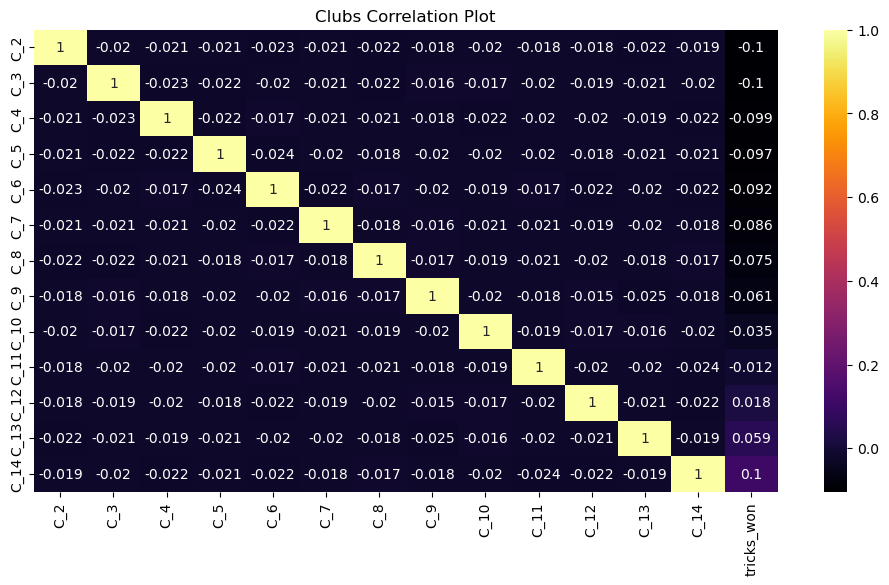

In [14]:
clubs = ["C_2", "C_3", "C_4", "C_5", "C_6", "C_7", "C_8", "C_9", "C_10", "C_11", "C_12", "C_13", "C_14"]

corr_player_hands_clubs = corr_player_hands_by_round_with_tricks[clubs + ["tricks_won"]]

corr_player_hands_clubs = corr_player_hands_clubs[corr_player_hands_clubs.index.isin(clubs)]

order_map = {card: idx for idx, card in enumerate(clubs)}

# Sort the DataFrame based on the custom order
corr_player_hands_clubs  = corr_player_hands_clubs.loc[sorted(corr_player_hands_clubs.index, key=lambda x: order_map[x])]

plt.figure(figsize=(12, 6))
plt.title("Clubs Correlation Plot")
sns.heatmap(corr_player_hands_clubs, annot = True, cmap = "inferno")
plt.show()

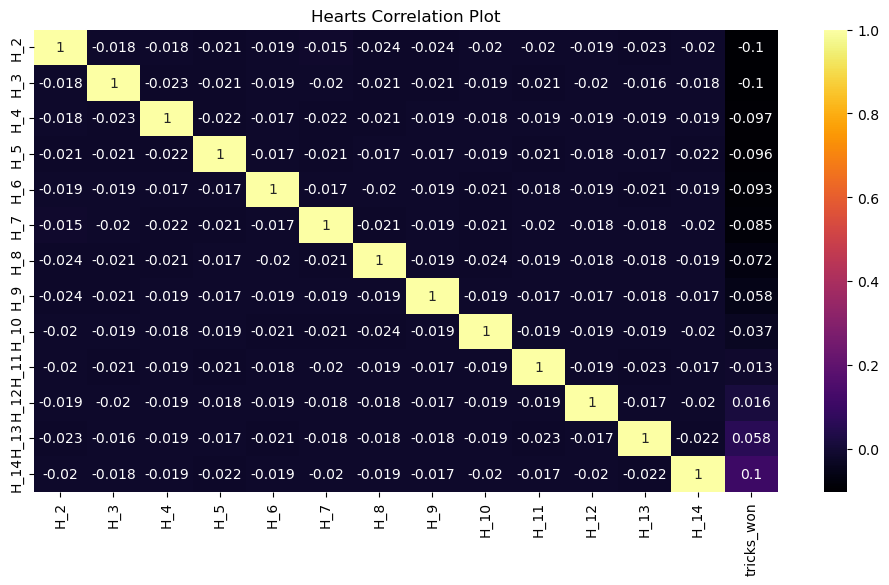

In [15]:
hearts = ["H_2", "H_3", "H_4", "H_5", "H_6", "H_7", "H_8", "H_9", "H_10", "H_11", "H_12", "H_13", "H_14"]

corr_player_hands_hearts = corr_player_hands_by_round_with_tricks[hearts + ["tricks_won"]]

corr_player_hands_hearts = corr_player_hands_hearts[corr_player_hands_hearts.index.isin(hearts)]

order_map = {card: idx for idx, card in enumerate(hearts)}

# Sort the DataFrame based on the custom order
corr_player_hands_hearts  = corr_player_hands_hearts.loc[sorted(corr_player_hands_hearts.index, key=lambda x: order_map[x])]

plt.figure(figsize=(12, 6))
plt.title("Hearts Correlation Plot")
sns.heatmap(corr_player_hands_hearts, annot = True, cmap = "inferno")
plt.show()

#### The relationships between higher value non-spades  and spades appear to be linear, but most are close to zero some of the relationship make be non-linear <br/><br/>
#### Multicollinearity 

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = player_hands_by_round_with_tricks.drop(columns=["player_name", "round", "tricks_won"], axis = 1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,D_8,1.284211
1,S_4,1.284210
2,H_7,1.284259
3,C_7,1.284180
4,S_2,1.284187
5,S_6,1.284224
6,H_2,1.284321
7,D_4,1.284228
8,S_10,1.284223
9,H_14,1.284163


#### All of the values are around 1 since suggests that the values are not high correlated with each other

#### Normality

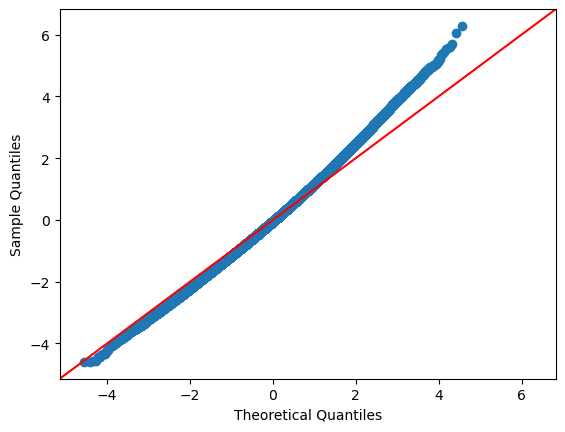

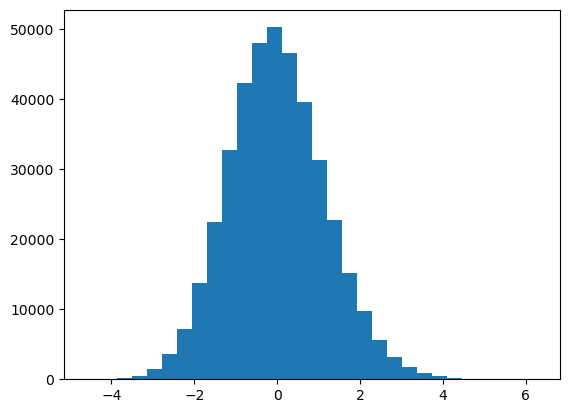

In [17]:
import statsmodels.api as sm

X = player_hands_by_round_with_tricks.drop(columns=["player_name", "tricks_won", "round"])  # Exclude non-numeric and target
y = player_hands_by_round_with_tricks["tricks_won"]
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

sm.qqplot(model.resid, line = "45")
plt.show()

plt.hist(model.resid, bins = 30)
plt.show()


#### Our residuals do not appear to be normal in all cases

In [18]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 2.46147374905709


#### We fail to reject that residuals are correlated. There appears to be a negative autocorrelation

In [19]:
X =  player_hands_by_round_with_tricks.drop(columns=["player_name", "tricks_won", "round"])
y = player_hands_by_round_with_tricks["tricks_won"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

trick_predictor_regression_model = LinearRegression(fit_intercept = False)

trick_predictor_regression_model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [20]:
y_train_pred = trick_predictor_regression_model.predict(X_train)
y_test_pred = trick_predictor_regression_model.predict(X_test)
y_train_pred_rounded_linear = np.round(y_train_pred).astype(int)
y_test_pred_rounded_linear = np.round(y_test_pred).astype(int)

# Metrics
print("Training R^2:", r2_score(y_train, y_train_pred_rounded_linear))
print("Testing R^2:", r2_score(y_test, y_test_pred_rounded_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred_rounded_linear))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred_rounded_linear))

Training R^2: 0.5328766380494915
Testing R^2: 0.5355819698883866
Mean Squared Error: 1.44485
Mean Absolute Error: 0.8981


#### Our model accounts for about half of the variation in our dependant variable and we are about 1 trick off on average in our trick predictor via the Mean Absolute Error

In [21]:
y_test_pred_at_least_or_more = pd.DataFrame({
    "y_test": y_test, 
    "y_pred_test": y_test_pred_rounded_linear
}).reset_index().assign(
    made_bid=np.where(y_test_pred_rounded_linear >= y_test, 1, 0)
)
made_bid = sum(y_test_pred_at_least_or_more["made_bid"] / len(y_test_pred_at_least_or_more))

In [22]:
print(f"Made our bid {round(made_bid * 100, 2)}% of the time")

Made our bid 68.03% of the time


#### Our model is predicting at or above the number of tricks achieved by each player in round. Note we only get the points for the round if we correctly predict the number of tricks or above|

In [23]:
coefficients = trick_predictor_regression_model.coef_
column_names = X_train.columns

# Create a DataFrame to display the coefficients with their corresponding column names
coefficients_data = pd.DataFrame(coefficients, index=column_names, columns=["coefficient"])
coefficients_data.sort_values(ascending = False, by = "coefficient")

,coefficient
S_14,1.521860
S_13,1.316110
S_12,1.126024
S_11,0.970815
S_10,0.847150
S_9,0.727455
H_14,0.667752
C_14,0.664799
S_8,0.660951
D_14,0.660601


#### As we expect, Spades and high level face cards have the highest value for their coefficients. Let's noramalize our coefficient values

In [24]:
coefficients_data["coefficient_norm"] = ((coefficients_data["coefficient"] - min(coefficients_data["coefficient"])) / 
                                         (max(coefficients_data["coefficient"]) - min(coefficients_data["coefficient"])))

coefficients_data.sort_values(ascending = False, by = "coefficient_norm")

,coefficient,coefficient_norm
S_14,1.521860,1.000000
S_13,1.316110,0.877662
S_12,1.126024,0.764638
S_11,0.970815,0.672351
S_10,0.847150,0.598821
S_9,0.727455,0.527651
H_14,0.667752,0.492152
C_14,0.664799,0.490396
S_8,0.660951,0.488108
D_14,0.660601,0.487900


#### Given the R^2 score Linear Regression may not be the best model for this data as there may be some non-linear relationships. Let's create a few more features and fit a new model

#### Features to add
#####      1. Number of Cards in Each Suit
#####      2. Number of Face Cards

#### Face Cards are cards above value 10 (Aces, Kings, Queens, and Jacks). 

In [25]:
pattern = r"_\d+$"

# Check if the pattern exists in each column name
matches = [bool(re.search(pattern, col)) for col in player_hands_by_round_with_tricks.columns]
card_columns = list(player_hands_by_round_with_tricks.columns[matches])

player_hands_by_round_with_tricks_long = pd.melt(player_hands_by_round_with_tricks, 
                                                 id_vars = ["player_name", "round"],
                                                 value_vars = card_columns,
                                                 var_name = "card",
                                                 value_name = "card_in_player_hand")

player_hands_by_round_with_tricks_long[["suit" , "card_rank" ]] = player_hands_by_round_with_tricks_long["card"].str.split("_", expand = True)
player_hands_by_round_with_tricks_long["card_rank"] = player_hands_by_round_with_tricks_long["card_rank"].astype(np.int64)
player_hands_by_round_with_tricks_long["card_in_player_hand"] = player_hands_by_round_with_tricks_long["card_in_player_hand"].astype(np.int64)

player_hands_by_round_with_tricks_long_filtered = player_hands_by_round_with_tricks_long[player_hands_by_round_with_tricks_long["card_in_player_hand"] == 1]

player_hands_by_round_with_tricks_long_filtered_suits_sum = player_hands_by_round_with_tricks_long_filtered.groupby(
    ["player_name", "round", "suit"])["card_in_player_hand"].sum().reset_index()

player_hands_by_round_with_tricks_filtered_suits_sum_wide = pd.pivot(player_hands_by_round_with_tricks_long_filtered_suits_sum,
                                                                    index = ["player_name", "round"],
                                                                    columns = "suit",
                                                                    values = "card_in_player_hand").reset_index()

player_hands_by_round_with_tricks_filtered_suits_sum_wide = player_hands_by_round_with_tricks_filtered_suits_sum_wide.rename(columns = {"S": "number_of_spades", "H": "number_of_hearts",
                                                                                                                                        "C": "number_of_clubs", "D" : "number_of_diamonds"})

player_hands_by_round_with_tricks_long_filtered_face_cards = player_hands_by_round_with_tricks_long_filtered

# Make an explicit copy if working with a subset
player_hands_by_round_with_tricks_long_filtered_face_cards = (
    player_hands_by_round_with_tricks_long_filtered_face_cards.copy()
)

# Add new columns for face cards and spade face cards
player_hands_by_round_with_tricks_long_filtered_face_cards.loc[:, "face_card"] = (
    player_hands_by_round_with_tricks_long_filtered_face_cards["card_rank"] >= 11
).astype(int)

player_hands_by_round_with_tricks_long_filtered_face_cards.loc[:, "spades_face_card"] = (
    (player_hands_by_round_with_tricks_long_filtered_face_cards["suit"] == "S") &
    (player_hands_by_round_with_tricks_long_filtered_face_cards["card_rank"] >= 11)
).astype(int)

player_hands_by_round_with_tricks_long_filtered_face_cards.loc[:, "diamonds_face_card"] = (
    (player_hands_by_round_with_tricks_long_filtered_face_cards["suit"] == "D") &
    (player_hands_by_round_with_tricks_long_filtered_face_cards["card_rank"] >= 11)
).astype(int)

player_hands_by_round_with_tricks_long_filtered_face_cards.loc[:, "clubs_face_card"] = (
    (player_hands_by_round_with_tricks_long_filtered_face_cards["suit"] == "C") &
    (player_hands_by_round_with_tricks_long_filtered_face_cards["card_rank"] >= 11)
).astype(int)

player_hands_by_round_with_tricks_long_filtered_face_cards.loc[:, "hearts_face_card"] = (
    (player_hands_by_round_with_tricks_long_filtered_face_cards["suit"] == "H") &
    (player_hands_by_round_with_tricks_long_filtered_face_cards["card_rank"] >= 11)
).astype(int)

player_hands_by_round_with_tricks_long_filtered_face_cards = player_hands_by_round_with_tricks_long_filtered_face_cards.groupby(
    ["player_name", "round"]
).agg(
    face_cards = ("face_card", "sum"),
    spades_face_cards = ("spades_face_card", "sum"),
    diamonds_face_cards = ("diamonds_face_card", "sum"),
    clubs_face_cards = ("clubs_face_card", "sum"),
    hearts_face_cards = ("hearts_face_card", "sum")
).reset_index()

player_hands_by_round_with_tricks_long_filtered_face_cards = player_hands_by_round_with_tricks_long_filtered_face_cards.drop_duplicates()

#### Join dataframes

In [26]:
player_hands_by_round_with_tricks_long_filtered_face_cards.head()

,player_name,round,face_cards,spades_face_cards,diamonds_face_cards,clubs_face_cards,hearts_face_cards
0,Arjun,0,5,2,2,1,0
1,Arjun,1,3,0,1,1,1
2,Arjun,2,5,1,1,0,3
3,Arjun,3,3,1,1,0,1
4,Arjun,4,6,1,1,2,2


In [27]:
player_hands_by_round_with_tricks_filtered_suits_sum_wide.head()

suit,player_name,round,number_of_clubs,number_of_diamonds,number_of_hearts,number_of_spades
0,Arjun,0,4.0,3.0,1.0,5.0
1,Arjun,1,4.0,3.0,3.0,3.0
2,Arjun,2,3.0,2.0,5.0,3.0
3,Arjun,3,1.0,1.0,6.0,5.0
4,Arjun,4,3.0,4.0,2.0,4.0


#### join hand counts on player hand data

In [28]:
player_hand_counts =  player_hands_by_round_with_tricks_filtered_suits_sum_wide.merge(
    player_hands_by_round_with_tricks_long_filtered_face_cards,
    how = "inner", 
    on = ["player_name", "round"]
)

player_hands_by_round_with_tricks = player_hands_by_round_with_tricks.merge(

    player_hand_counts,
    how = "left",
    on = ["player_name", "round"]
)

player_hands_by_round_with_tricks["number_of_clubs"] = player_hands_by_round_with_tricks["number_of_clubs"].fillna(0)
player_hands_by_round_with_tricks["number_of_diamonds"] = player_hands_by_round_with_tricks["number_of_diamonds"].fillna(0)
player_hands_by_round_with_tricks["number_of_spades"] = player_hands_by_round_with_tricks["number_of_spades"].fillna(0)
player_hands_by_round_with_tricks["number_of_hearts"] = player_hands_by_round_with_tricks["number_of_hearts"].fillna(0)


In [29]:
# replace 0 with small positive value for log

#  clubs
player_hands_by_round_with_tricks["number_of_clubs_sq"] = player_hands_by_round_with_tricks["number_of_clubs"]**2
player_hands_by_round_with_tricks["number_of_clubs_cb"] = player_hands_by_round_with_tricks["number_of_clubs"]**3
player_hands_by_round_with_tricks["number_of_clubs_log"] = np.log(player_hands_by_round_with_tricks["number_of_clubs"].replace(0, 1e-10))
player_hands_by_round_with_tricks["clubs_face_cards_sq"] = player_hands_by_round_with_tricks["clubs_face_cards"]**2
player_hands_by_round_with_tricks["clubs_face_cards_cb"] = player_hands_by_round_with_tricks["clubs_face_cards"]**3
player_hands_by_round_with_tricks["clubs_face_cards_log"] = np.log(player_hands_by_round_with_tricks["clubs_face_cards"].replace(0, 1e-10))

# diamonds
player_hands_by_round_with_tricks["number_of_diamonds_sq"] = player_hands_by_round_with_tricks["number_of_diamonds"]**2
player_hands_by_round_with_tricks["number_of_diamonds_cb"] = player_hands_by_round_with_tricks["number_of_diamonds"]**3
player_hands_by_round_with_tricks["number_of_diamonds_log"] = np.log(player_hands_by_round_with_tricks["number_of_diamonds"].replace(0, 1e-10))
player_hands_by_round_with_tricks["diamonds_face_cards_sq"] = player_hands_by_round_with_tricks["diamonds_face_cards"]**2
player_hands_by_round_with_tricks["diamonds_face_cards_cb"] = player_hands_by_round_with_tricks["diamonds_face_cards"]**3
player_hands_by_round_with_tricks["diamonds_face_cards_log"] = np.log(player_hands_by_round_with_tricks["diamonds_face_cards"].replace(0, 1e-10))

# spades
player_hands_by_round_with_tricks["number_of_spades_sq"] = player_hands_by_round_with_tricks["number_of_spades"]**2
player_hands_by_round_with_tricks["number_of_spades_cb"] = player_hands_by_round_with_tricks["number_of_spades"]**3
player_hands_by_round_with_tricks["number_of_spades_log"] = np.log(player_hands_by_round_with_tricks["number_of_spades"].replace(0, 1e-10))
player_hands_by_round_with_tricks["spades_face_cards_sq"] = player_hands_by_round_with_tricks["spades_face_cards"]**2
player_hands_by_round_with_tricks["spades_face_cards_cb"] = player_hands_by_round_with_tricks["spades_face_cards"]**3
player_hands_by_round_with_tricks["spades_face_cards_log"] = np.log(player_hands_by_round_with_tricks["spades_face_cards"].replace(0, 1e-10))

# hearts
player_hands_by_round_with_tricks["number_of_hearts_sq"] = player_hands_by_round_with_tricks["number_of_hearts"]**2
player_hands_by_round_with_tricks["number_of_hearts_cb"] = player_hands_by_round_with_tricks["number_of_hearts"]**3
player_hands_by_round_with_tricks["number_of_hearts_log"] = np.log(player_hands_by_round_with_tricks["number_of_hearts"].replace(0, 1e-10))
player_hands_by_round_with_tricks["hearts_face_cards_sq"] = player_hands_by_round_with_tricks["hearts_face_cards"]**2
player_hands_by_round_with_tricks["hearts_face_cards_cb"] = player_hands_by_round_with_tricks["hearts_face_cards"]**3
player_hands_by_round_with_tricks["hearts_face_cards_log"] = np.log(player_hands_by_round_with_tricks["hearts_face_cards"].replace(0, 1e-10))


#### We should add some non linear features as well.

#### Split the data into training and testing sets

In [30]:
X =  player_hands_by_round_with_tricks.drop(columns=["player_name", "tricks_won", "round"])
y = player_hands_by_round_with_tricks["tricks_won"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

### Model Selection
#### Ridge Regression

In [31]:
ridge_model = Ridge(fit_intercept = False)
ridge_params = {"alpha": [0, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10**1, 10**2,10**3, 10**4, 10**5],
                "solver" : ["auto"]}

In [33]:
cv_ridge = GridSearchCV(ridge_model, param_grid = ridge_params, scoring = ["neg_root_mean_squared_error", "r2", "neg_mean_absolute_error"],
                        n_jobs = None, refit = "r2", cv = 4, error_score = np.nan, return_train_score = True,
                       verbose = 2)

In [34]:
cv_ridge.fit(X_train, y_train) 

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] END ...............................alpha=0, solver=auto; total time=   2.5s
[CV] END ...............................alpha=0, solver=auto; total time=   2.9s
[CV] END ...............................alpha=0, solver=auto; total time=   2.2s
[CV] END ...............................alpha=0, solver=auto; total time=   2.6s
[CV] END ...........................alpha=1e-05, solver=auto; total time=   0.5s
[CV] END ...........................alpha=1e-05, solver=auto; total time=   0.4s
[CV] END ...........................alpha=1e-05, solver=auto; total time=   0.5s
[CV] END ...........................alpha=1e-05, solver=auto; total time=   0.5s
[CV] END ..........................alpha=0.0001, solver=auto; total time=   0.5s
[CV] END ..........................alpha=0.0001, solver=auto; total time=   0.5s
[CV] END ..........................alpha=0.0001, solver=auto; total time=   0.5s
[CV] END ..........................alpha=0.0001,

GridSearchCV(cv=4, estimator=Ridge(fit_intercept=False),
             param_grid={'alpha': [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                   100, 1000, 10000, 100000],
                         'solver': ['auto']},
             refit='r2', return_train_score=True,
             scoring=['neg_root_mean_squared_error', 'r2',
                      'neg_mean_absolute_error'],
             verbose=2)

In [35]:
cv_ridge_data = pd.DataFrame(cv_ridge.cv_results_)
cv_ridge_data[["param_alpha", "mean_train_neg_root_mean_squared_error", "mean_test_neg_root_mean_squared_error", 
               "mean_train_neg_mean_absolute_error", "mean_test_neg_mean_absolute_error",
               "mean_test_r2", "mean_train_r2"]]


,param_alpha,mean_train_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,mean_train_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,mean_test_r2,mean_train_r2
0,0.00000,-1.155305,-1.155699,-0.916942,-0.917204,0.568480,0.568784
1,0.00001,-1.154712,-1.155056,-0.916670,-0.916938,0.568960,0.569227
2,0.00010,-1.154712,-1.155056,-0.916670,-0.916938,0.568960,0.569227
3,0.00100,-1.154712,-1.155056,-0.916670,-0.916938,0.568960,0.569227
4,0.01000,-1.154712,-1.155056,-0.916670,-0.916938,0.568960,0.569227
5,0.10000,-1.154712,-1.155056,-0.916670,-0.916938,0.568960,0.569227
6,1.00000,-1.154712,-1.155055,-0.916670,-0.916938,0.568960,0.569227
7,10.00000,-1.154712,-1.155054,-0.916670,-0.916936,0.568961,0.569227
8,100.00000,-1.154717,-1.155049,-0.916671,-0.916931,0.568964,0.569223
9,1000.00000,-1.154770,-1.155084,-0.916709,-0.916956,0.568938,0.569184


In [36]:
cv_ridge.best_params_ 

{'alpha': 100, 'solver': 'auto'}

#### Lambda = 100 with mean absolute error = 0.916738 is our best model but performs worse than our Linear Regression. A linear model may not be the best model for our data

#### Some of the relation_ships in our data appear to be non-linear let's make some more features and test some non Linear models

#### Random Forest

In [37]:
random_forest_regressor = RandomForestRegressor(random_state = 99)

In [39]:
random_forest_params_ex = {"n_estimators" : [10, 50, 100]}

scoring = {
    "neg_mean_squared_error": make_scorer(mean_squared_error, greater_is_better=False),
    "r2": make_scorer(r2_score),
    "neg_mean_absolute_error": make_scorer(mean_absolute_error, greater_is_better=False)
}

cv_random_forest_regressor = GridSearchCV(
    random_forest_regressor, 
    param_grid=random_forest_params_ex, 
    scoring=scoring,
    verbose=2,
    n_jobs=None, 
    refit="r2",  
    cv=4, 
    error_score=np.nan, 
    return_train_score=True
)

In [ ]:
cv_random_forest_regressor.fit(X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] END ....................................n_estimators=10; total time= 1.5min
[CV] END ....................................n_estimators=10; total time= 1.5min
[CV] END ....................................n_estimators=10; total time= 1.5min
[CV] END ....................................n_estimators=10; total time= 1.5min
[CV] END ....................................n_estimators=50; total time= 7.3min
[CV] END ....................................n_estimators=50; total time= 7.4min
[CV] END ....................................n_estimators=50; total time= 6.5min
[CV] END ....................................n_estimators=50; total time= 5.1min
[CV] END ...................................n_estimators=100; total time=10.2min
[CV] END ...................................n_estimators=100; total time=10.6min
[CV] END ...................................n_estimators=100; total time=10.6min
[CV] END ...................................n_est

In [35]:
y_train_pred_rf = random_forest_regressor.predict(X_train)
y_test_pred_rf = random_forest_regressor.predict(X_test)
y_train_pred_rounded = np.round(y_train_pred_rf).astype(int)
y_test_pred_rounded = np.round(y_test_pred_rf).astype(int)

In [36]:
r2_train_rf = r2_score(y_train, y_train_pred_rounded)
r2_test_rf  = r2_score(y_test, y_test_pred_rounded)

# Metrics
print("Training R^2:", r2_train_rf )
print("Testing R^2:", r2_test_rf )
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred_rounded))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred_rounded))

Training R^2: 0.9122661172715809
Testing R^2: 0.49054651355905765
Mean Squared Error: 1.5717925
Mean Absolute Error: 0.9416925


In [37]:
y_test_pred_at_least_or_more_rf = pd.DataFrame({
    "y_test": y_test, 
    "y_pred_test": y_test_pred_rounded
}).reset_index().assign(
    made_bid=np.where(y_test_pred_rounded >= y_test, 1, 0)
)

made_bid_rf = sum(y_test_pred_at_least_or_more_rf["made_bid"] / len(y_test_pred_at_least_or_more))

In [40]:
print(f"Made our bid {round(made_bid_rf * 100, 2)}% of the time")

Made our bid 68.26% of the time
